Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## План работы

* Загрузите и подготовьте данные. Поясните порядок действий.
* Обучите и проверьте модель для каждого региона:
* 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
* 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
* 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
* 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
*2.5. Проанализируйте результаты.
Подготовьтесь к расчёту прибыли:
* 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
*  3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
* 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
* 4.1. Выберите скважины с максимальными значениями предсказаний.
* 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
* 4.3. Рассчитайте прибыль для полученного объёма сырья.
Посчитайте риски и прибыль для каждого региона:
* 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
* 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

### Описание данных
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).


### Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [3]:
df_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Поэтапно рассмотрим каждый регион и решим задачи связанные с подготовкой данных отдельно взятого региона.Возможно у каждого региона разные "проблемы" в данных.

###  Регион - df_0

In [4]:
df_0.shape

(100000, 5)

In [5]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

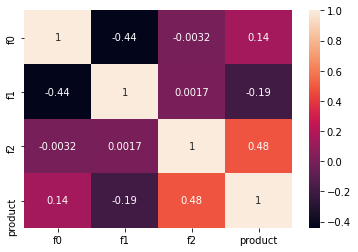

In [9]:

sns.heatmap(df_0.corr(), annot = True);

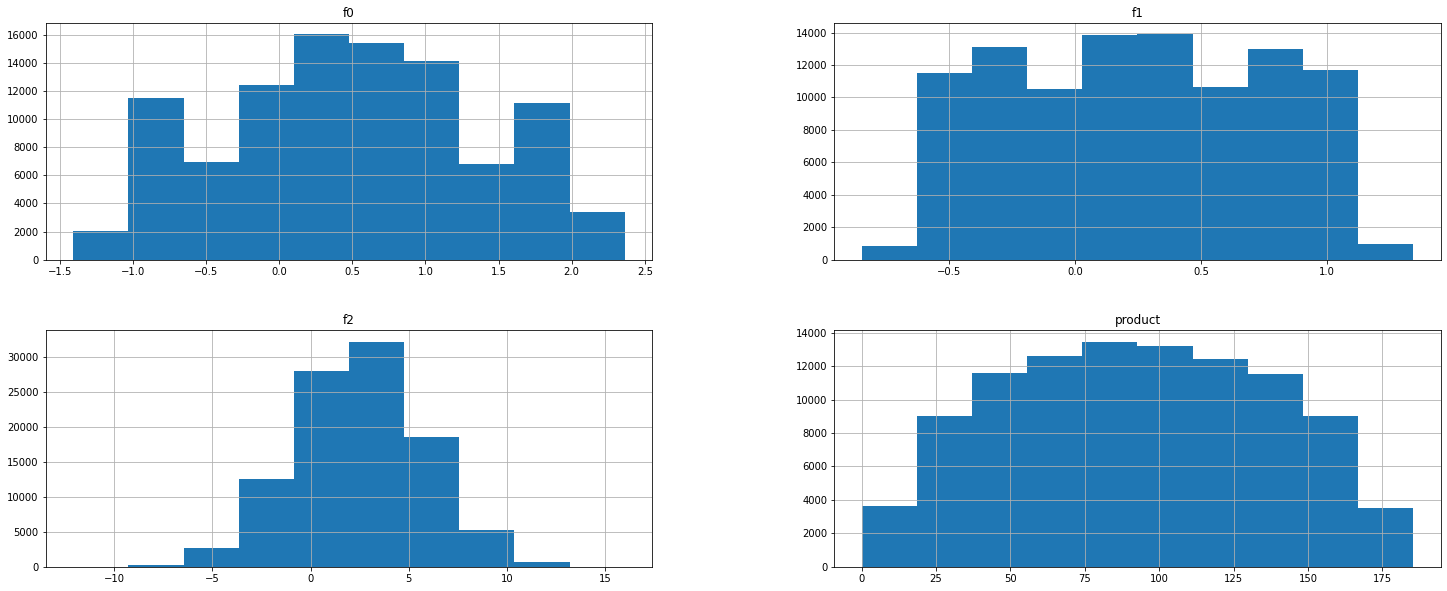

In [10]:
df_0.hist(figsize=(25,10));

##### Вывод по региону df_0

* данные по региону df_0 чистые,аномальных значений не видно 

In [11]:
df_0= df_0.drop('id', axis=1)
df_1= df_1.drop('id', axis=1)
df_2= df_2.drop('id', axis=1)

###  Регион - df_1

In [12]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [14]:
df_1.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

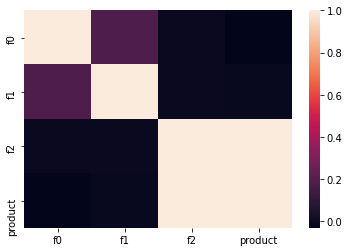

In [15]:
sns.heatmap(df_1.corr());

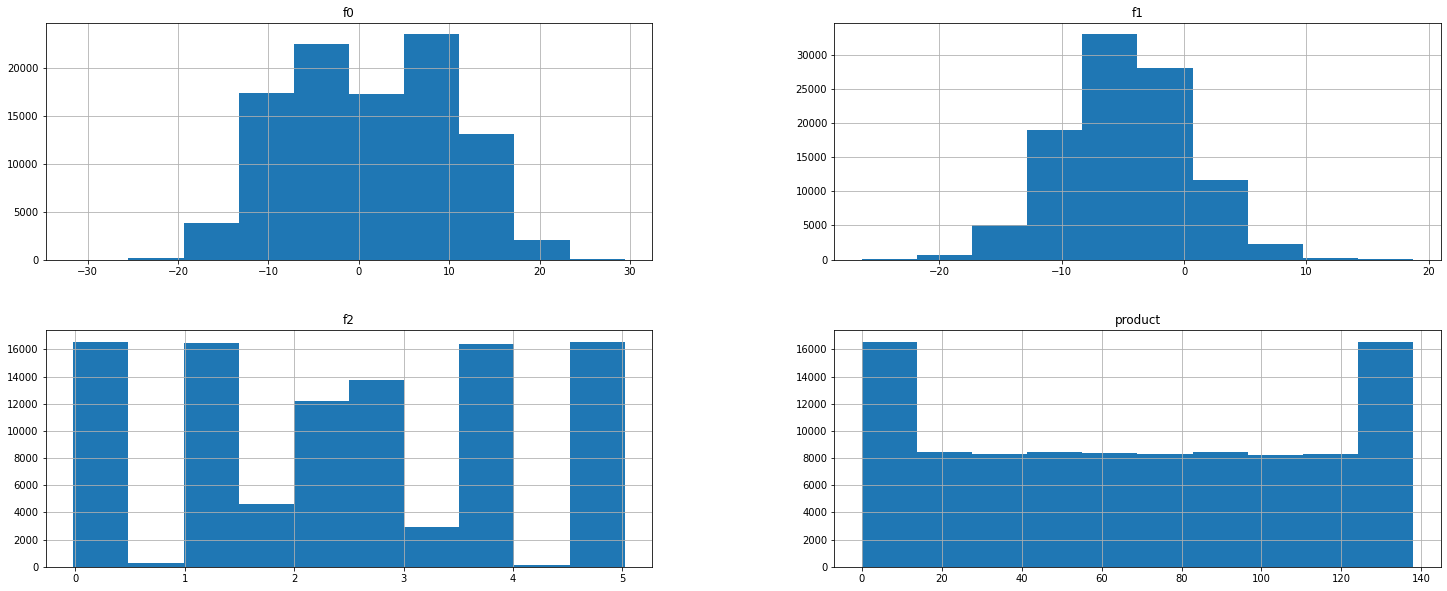

In [16]:
df_1.hist(figsize=(25,10));

<AxesSubplot:>

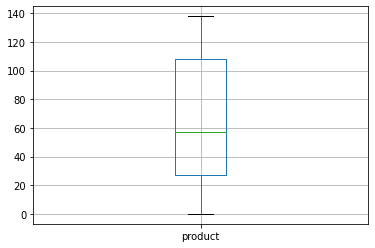

In [17]:
df_1.boxplot('product')

##### Вывод по региону df_1

* В данных по региону df_1 была найдена сильная корреляция по столбцу f2.Я пришел к выводу что данный столбец нужно удалить.Возможно в заполнении данных была допущена ошибка.Так же меня смущает то, что в гистограмме по столбцу product аномально высокие занчения в начале и в коцнеграфика, что сведетельствует о не нормальности распределения.

###  Регион - df_2

In [18]:
df_2.shape

(100000, 4)

In [19]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [21]:
df_2.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

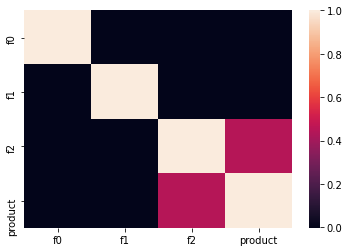

In [22]:
sns.heatmap(df_2.corr());

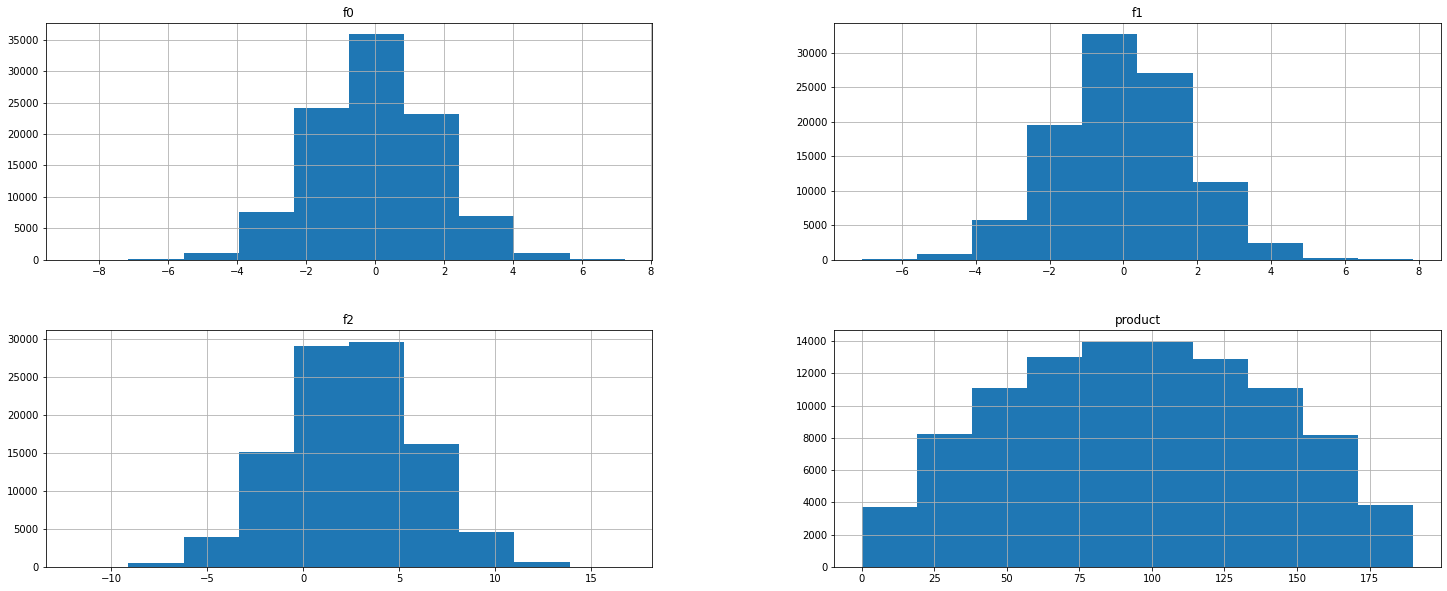

In [23]:
df_2.hist(figsize=(25,10));

##### Вывод по региону df_2

* В данном регионе аномальных значений нет

## Обучение и проверка модели

Разобьем данные на две выборки,тренировочную и валидационную в соотношении 75:25 и стандартизируем данные

In [24]:
target_0 = df_0['product']
features_0 = df_0.drop(['product'],axis=1)

In [25]:
target_1 = df_1['product']
features_1 = df_1.drop(['product'],axis=1)

In [26]:
target_2 = df_2['product']
features_2 = df_2.drop(['product'],axis=1)

In [27]:
features_train_0, features_valid_0,target_train_0,target_valid_0 = train_test_split(features_0,target_0,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)
features_train_1, features_valid_1,target_train_1,target_valid_1 = train_test_split(features_1,target_1,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)
features_train_2, features_valid_2,target_train_2,target_valid_2 = train_test_split(features_2,target_2,
                                                                                          test_size=0.25,
                                                                                          random_state=12345)


In [28]:
print(features_train_0.shape)
print(features_valid_0.shape)

(75000, 3)
(25000, 3)


In [29]:
print(target_train_0.shape)
print(target_valid_0.shape)


(75000,)
(25000,)


In [30]:
#стандартизируем данные кроме целевого признака
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

features_train_0 = scaler.fit_transform(features_train_0)
features_valid_0 = scaler.transform(features_valid_0)

scaler = StandardScaler()
features_train_1 = scaler.fit_transform(features_train_1)
features_valid_1 = scaler.transform(features_valid_1)

scaler = StandardScaler()
features_train_2 = scaler.fit_transform(features_train_2)
features_valid_2 = scaler.transform(features_valid_2)

Приступим к логистической регрессии и RMSE

In [31]:
def mod(features_train,features_valid,target_train,target_valid):
    model = LinearRegression()
    model.fit(features_train,target_train)
    prediction_valid = pd.Series(model.predict(features_valid))
    
    rmse = mean_squared_error(prediction_valid,target_valid) ** 0.5
    mean = prediction_valid.mean()
    return prediction_valid,rmse,mean

In [32]:
pred0,rmse0,mean0= mod(features_train_0,features_valid_0,target_train_0,target_valid_0)

pred1,rmse1,mean1= mod(features_train_1,features_valid_1,target_train_1,target_valid_1)

pred2,rmse2,mean2= mod(features_train_2,features_valid_2,target_train_2,target_valid_2)

In [33]:
print(f'Для региона 0 средний запас предсказанного сырья составил {mean0}, а RMSE модели {rmse0}')

print(f'Для региона 1 средний запас предсказанного сырья составил {mean1}, а RMSE модели {rmse1}')

print(f'Для региона 2 средний запас предсказанного сырья составил {mean2}, а RMSE модели {rmse2}')

Для региона 0 средний запас предсказанного сырья составил 92.59256778438035, а RMSE модели 37.5794217150813
Для региона 1 средний запас предсказанного сырья составил 68.728546895446, а RMSE модели 0.893099286775617
Для региона 2 средний запас предсказанного сырья составил 94.96504596800489, а RMSE модели 40.02970873393434


In [34]:
print(f'Для региона 0 средний запас сырья по целевому признаку составил',target_0.mean())

print(f'Для региона 1 средний запас сырья по целевому признаку составил ',target_1.mean())

print(f'Для региона 2 средний запас сырья по целевому признаку составил ',target_2.mean())

Для региона 0 средний запас сырья по целевому признаку составил 92.50000000000001
Для региона 1 средний запас сырья по целевому признаку составил  68.82500000000002
Для региона 2 средний запас сырья по целевому признаку составил  95.00000000000004


#### Вывод

Среднее значение и предсказания практически индентичны,это хорший знак.Значит предсказания макисмально верны.

## Подготовка к расчёту прибыли

### Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [35]:
points = 500
best_200 = 200
budget = 10_000_000_000
barrel = 450000
loss = 2.5

In [36]:
one_point_budget = int(budget / best_200)
print(f'Бюджет на разработку одной скважины {one_point_budget}')

Бюджет на разработку одной скважины 50000000


In [37]:
min = round(one_point_budget / barrel,2)

In [38]:
print('Количество сырья в месторождениях региона, достаточное для разработки',min)

Количество сырья в месторождениях региона, достаточное для разработки 111.11


Среднее значение запаса сырья ниже,чем мы расчитали.Это показывает нам то, что окупаемости не может быть, но для более точного подсчета нужно подобрать более качесвенные параметры

In [39]:
#функция для расчета прибыли по 200 лучшим скважинам
def function(target_valid, predictions_valid):
    max_200 = predictions_valid.sort_values(ascending=False).head(200)
    target_200 = target_valid[max_200.index]
    income = target_200.sum() * barrel - budget
    return income
    

In [40]:
print(int(function(target_0,pred0)))
print(int(function(target_1,pred1)))
print(int(function(target_2,pred2)))

-1922149005
-4015754052
-1259258892


In [41]:
function(target_valid_0.reset_index(drop=True), pd.Series(pred0))

3320826043.1398506

### Вывод

Мы получили очень хорошие результаты,но они показывают нам значения,если мы проведем поиск по всем месторождениям, но так мы не сможем, так как бюджет заточен только на 500.

## Расчёт прибыли и рисков 

In [42]:
def bootstrap(target,prediction):
    state = np.random.RandomState(12345)
    revenue_bootstrap = []
    
    for i in range(1000):
        prediction_supsample = pd.Series(prediction).sample(n=points,replace=True,random_state=state)
        target_supsampl =target.reset_index(drop=True)[prediction_supsample.index] 
        revenue_bootstrap.append(function(target_supsampl,prediction_supsample))
    revenue_bootstrap = pd.Series(revenue_bootstrap)
    mean = revenue_bootstrap.mean()
    lower = revenue_bootstrap.quantile(.025)
    upper = revenue_bootstrap.quantile(.975)
    risk =(len(revenue_bootstrap[revenue_bootstrap<0])/len(revenue_bootstrap))*100  
    return mean,lower,upper,risk
    

In [43]:
mean0,lower0,upper0,risk0= bootstrap(target_valid_0,pred0)

mean1,lower1,upper1,risk1= bootstrap(target_valid_1,pred1)

mean2,lower2,upper2,risk2= bootstrap(target_valid_2,pred2)

In [44]:
print('Среднее значение прибыли для региона 0 равнв ',mean0)
print(f'Доверительный интервал для региона 0 находится в промежутке между {lower0} и {upper0}')
print(f'Уровень риска равен {risk0}')

Среднее значение прибыли для региона 0 равнв  600735244.2611653
Доверительный интервал для региона 0 находится в промежутке между 12948331.135115242 и 1231163605.7914982
Уровень риска равен 2.0


In [45]:
print('Среднее значение прибыли для региона 1 равнв ',mean1)
print(f'Доверительный интервал для региона 0 находится в промежутке между {lower1} и {upper1}')
print(f'Уровень риска равен {risk1}')

Среднее значение прибыли для региона 1 равнв  665241058.2210723
Доверительный интервал для региона 0 находится в промежутке между 157988481.31991574 и 1197641587.4631522
Уровень риска равен 0.3


In [46]:
print('Среднее значение прибыли для региона 2 равнв ',mean2)
print(f'Доверительный интервал для региона 0 находится в промежутке между {lower2} и {upper2}')
print(f'Уровень риска равен {risk2}')

Среднее значение прибыли для региона 2 равнв  615559722.8409678
Доверительный интервал для региона 0 находится в промежутке между -12218495.237293953 и 1230644473.941316
Уровень риска равен 3.0


## Вывод

Таким образом получается, что лучше всего для для разработки нам подойдет регион 1, так как уровень риска в нем ниже всего,а доверительные интервалы выше, чем  в двух других регионах.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [X]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован